In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.ar_model import AR, ARResults

df=pd.read_csv('Data/uspopulation.csv',parse_dates=True,index_col='DATE')
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


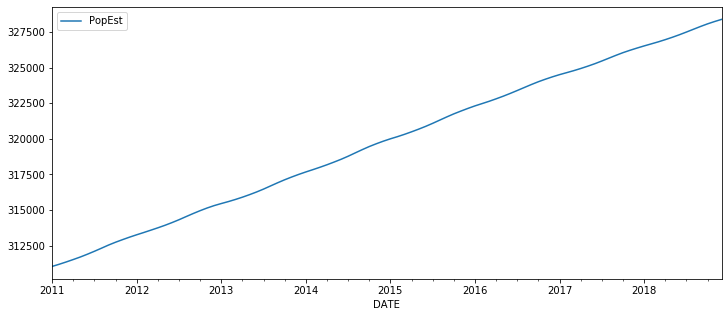

In [5]:
df.plot(figsize=(12,5));

In [6]:
len(df)

96

In [7]:
train=df.iloc[:84]
test=df.iloc[84:]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
model=AR(train['PopEst'])
AR1fit=model.fit(maxlag=1,method='mle')

In [12]:
print('Lag: ',AR1fit.k_ar)
print('Coefficients: ',AR1fit.params)

Lag:  1
Coefficients:  const        129.757738
L1.PopEst      0.999593
dtype: float64


In [13]:
start=len(train)
end=len(train)+len(test)-1
predictions1=AR1fit.predict(start=start,end=end,dynamic=False).rename('AR1 Forecast')

In [14]:
predictions1

2018-01-01    326374.758906
2018-02-01    326371.519132
2018-03-01    326368.280679
2018-04-01    326365.043545
2018-05-01    326361.807730
2018-06-01    326358.573234
2018-07-01    326355.340057
2018-08-01    326352.108196
2018-09-01    326348.877653
2018-10-01    326345.648426
2018-11-01    326342.420515
2018-12-01    326339.193919
Freq: MS, Name: AR1 Forecast, dtype: float64

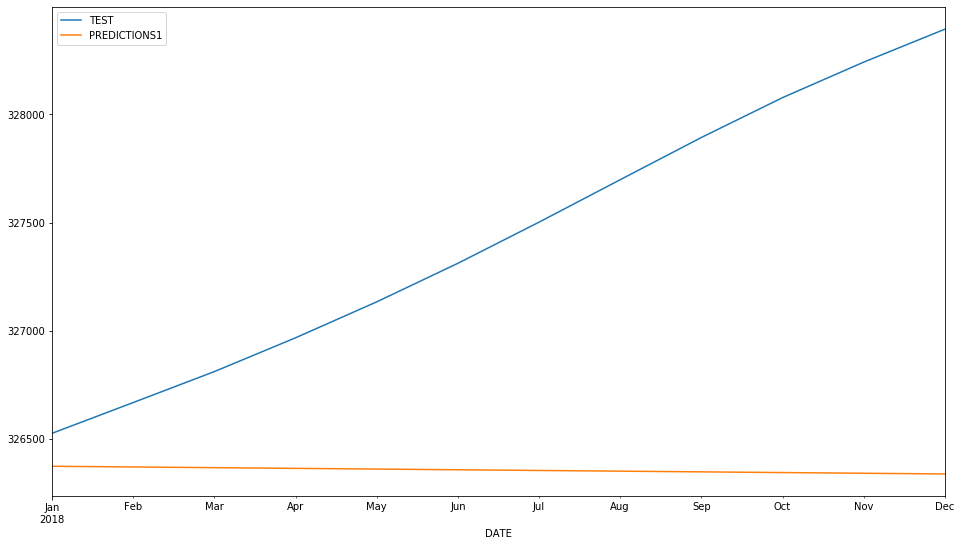

In [16]:
test['PopEst'].plot(legend=True,label='TEST',figsize=(16,9))
predictions1.plot(legend=True,label='PREDICTIONS1',figsize=(16,9));

In [17]:
model=AR(train['PopEst'])
AR2fit=model.fit(maxlag=2,method='mle')

In [18]:
start=len(train)

end=len(train)+len(test)-1

predictions2 = AR2fit.predict(start=start,end=end,dynamic=False).rename('AR2 Forecast')

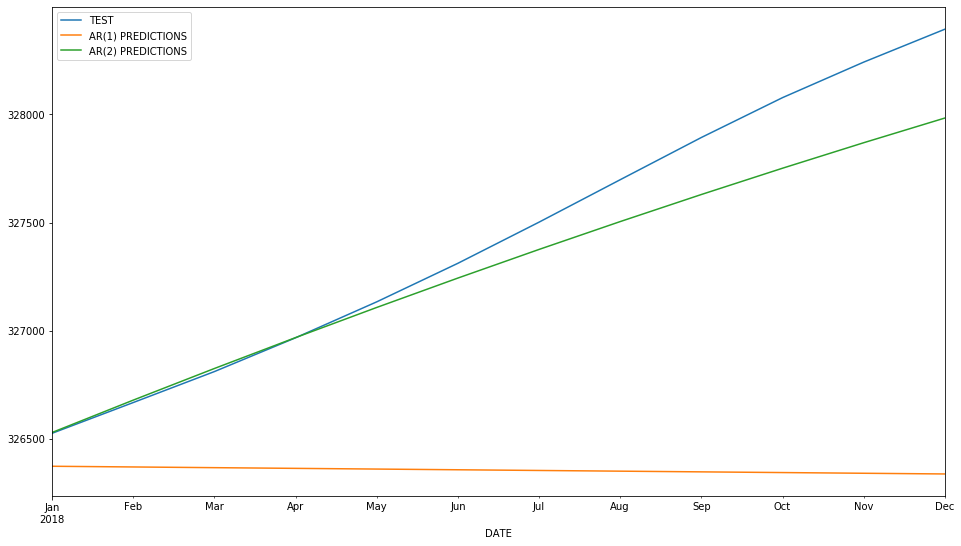

In [19]:
test['PopEst'].plot(legend=True,label='TEST',figsize=(16,9))
predictions1.plot(legend=True,label='AR(1) PREDICTIONS',figsize=(16,9));

predictions2.plot(legend=True,label='AR(2) PREDICTIONS',figsize=(16,9));

In [22]:
model=AR(train['PopEst'])
ARfit=model.fit(method='mle')
print('Lag: ',ARfit.k_ar)
print('Coefficients: ',ARfit.params)

Lag:  11
Coefficients:  const         96.164688
L1.PopEst      2.274877
L2.PopEst     -2.066815
L3.PopEst      1.506243
L4.PopEst     -1.195925
L5.PopEst      0.783762
L6.PopEst     -0.855629
L7.PopEst      0.840176
L8.PopEst     -0.324523
L9.PopEst      0.350165
L10.PopEst    -0.340452
L11.PopEst     0.027817
dtype: float64


In [23]:
start=len(train)

end=len(train)+len(test)-1

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename('AR11 Forecast')

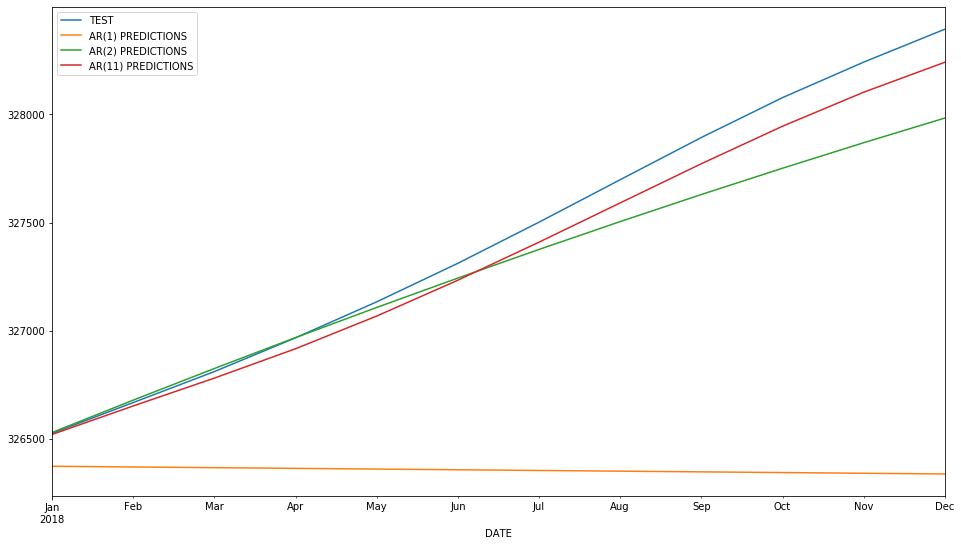

In [24]:
test['PopEst'].plot(legend=True,label='TEST',figsize=(16,9))
predictions1.plot(legend=True,label='AR(1) PREDICTIONS',figsize=(16,9));

predictions2.plot(legend=True,label='AR(2) PREDICTIONS',figsize=(16,9));

predictions11.plot(legend=True,label='AR(11) PREDICTIONS',figsize=(16,9));

# Evaluation

In [25]:
from sklearn.metrics import mean_squared_error

## Take Home : Print the MAE, MSE, RMSE for AR1, AR2, and AR11

In [ ]:
labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1,predictions2,predictions11]
for i in range(3):
    mse = mean_squared_error(test['PopEst'],preds[i])
    mae = mean_absolute_error(test['PopEst'],preds[i])
    rmse = np.sqrt(mse)
    print(f'{labels[i]} > Mean Squared Error: {mse:11.10} > Mean Absolute Error: {mae:11.10} > Root Mean Squared Error: {rmse:11



## Printing AIC - Akaike Information Critereon

In [ ]:
models = [AR1fit,AR2fit,ARfit]
for i in range(3):
    print(f'{labels[i]} :: AIC : {models[i].aic:11.10}



# Forecasting using AR